<a href="https://colab.research.google.com/github/asegura4488/CienciaDatos/blob/main/Semana6/SegmentacionImagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
import numpy as np
import numpy.typing as npt
from pathlib import Path
from skimage import color as skcolor
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import seaborn as sns
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Cursos/CursoCienciaDatos/Semana6/Datos')
!ls

Churn_Modelling.csv  img


In [3]:
root = "./img"

In [9]:
def read_rgb_float01(path: str):
    """cv2.imread -> RGB float32 en [0,1]"""
    arr = cv2.imread(path, cv2.IMREAD_COLOR)
    if arr is None:
        raise FileNotFoundError(f"No se puede leer: {path}")
    arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
    return (arr.astype(np.float32) / 255.0)

def normalize_img(img: np.ndarray, rimg: np.ndarray, eps: float = 1e-8) -> np.ndarray:
    """Normaliza por imagen de referencia, resultado en [0,1]."""
    norm = img / (rimg + eps)
    norm = np.nan_to_num(norm, nan=0.0, posinf=0.0, neginf=0.0)
    return np.clip(norm, 0.0, 1.0).astype(np.float32)

In [16]:
pairs = []
for ref_path in Path(root).rglob("*_ref.png"):
    img_path = Path(str(ref_path).replace("_ref.png", ".png"))
    if img_path.exists():
        pairs.append((img_path, ref_path))

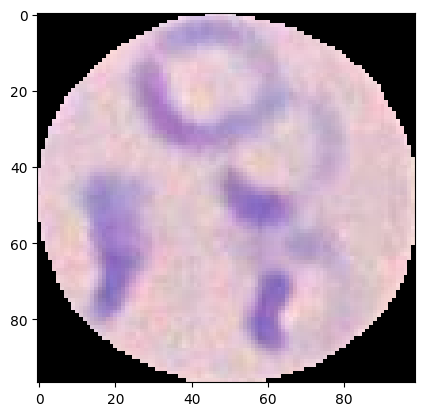

In [37]:
img = cv2.imread("./img/000_seg_000.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32) / 255.0
plt.imshow(img)

img/000_seg_001.png img/000_seg_001_ref.png
img/000_seg_002.png img/000_seg_002_ref.png
img/000_seg_000.png img/000_seg_000_ref.png


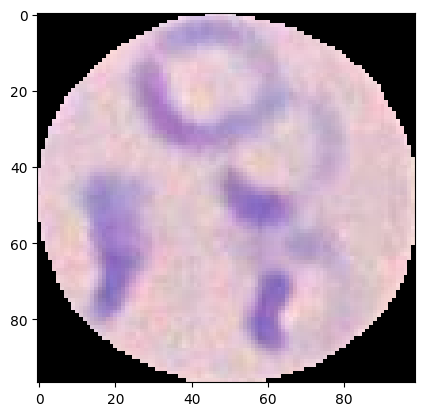

In [38]:
for (img_path, ref_path) in pairs:
  print(img_path,ref_path)
  img  = read_rgb_float01(str(img_path))
  plt.imshow(img)